# Product Purchased or not

For Purchasing prediction we will use 3 Algorithms
1. LogisticRegression
2. DecisionTreeClassifier
3. KNeighborsClassifier

By using the above algorithms, we will train our model by providing training data and once the model will be trained, we will perform prediction. After prediction, we will evaluate the performance of these algorithmns.

Steps been followed are as:

Step 1:Data Exploration

Step 2: Data Cleaning

Step 3: Data Visualization

Step 4:Data training

Step 5: Importing Models

Step 6:Importing Pipeline to Connect the Steps

Step 7:Hyperparameter Tunning

Step 8:Training our all three models by using pipeline¶

Step 9: Performance Evaluation

# Data Exploration

In [121]:
import pandas as pd
import numpy as np

In [122]:
df=pd.read_csv('Social_Network_Ads.csv')

In [123]:
df.shape

(400, 5)

In [124]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [125]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [127]:
df.sample(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
399,15594041,Female,49,36000,1
202,15735549,Female,39,134000,1
114,15739160,Male,42,80000,0
48,15727696,Male,30,135000,1
361,15778830,Female,53,34000,1


# Data Cleaning

As we can see above their is a column Name: "User ID" which is not for our use 

So, we drop our "User ID" columns with the help of drop() function

In [128]:
df=df.drop(columns='User ID',axis=1)

# Data Visualization

In [130]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='Age', ylabel='EstimatedSalary'>

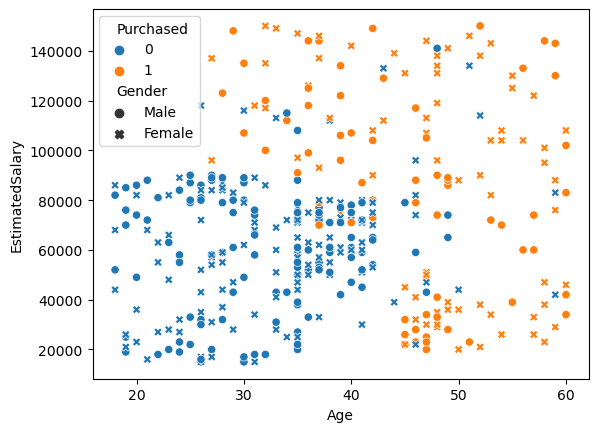

In [131]:
sns.scatterplot(x=df['Age'],y=df['EstimatedSalary'],hue=df['Purchased'],style=df['Gender'])

# Insights
The people with less age and less Estimated Salary have purchase less

And

People with more age and more Estimated Salary have purchase more

# Data Training

In [132]:
# Import train_test_split from sklearn.model_selection
from sklearn.model_selection import train_test_split

In [133]:
# Here, xtrain and xtest is the data which will have features and ytrain and ytest will have our target i.e. Purchased or not.
xtrain,xtest,ytrain,ytest=train_test_split(df.drop(columns='Purchased',axis=1),df['Purchased'],test_size=0.20)
# Ratio used for splitting training and testing data is 8:2 respectively

In [134]:
print(xtrain.shape)
print(xtest.shape)

(320, 3)
(80, 3)


Now we convert our Categorical column (Gender) into a Numerical Column by using OneHotEncoder

And Scale our Numerical columns "Age , Estimated Salary" with the help of StandardScaler because there is a big difference between the value of both

In [135]:
# importing OneHotEncoder and StandardScaler from sklearn
from sklearn.preprocessing import OneHotEncoder,StandardScaler

In [136]:
one=OneHotEncoder()
scale=StandardScaler()

In [137]:
# Importing ColumnTransformer from sklearn because it is a powerful tool that allows us to apply different preprocessing and feature extraction pipelines to different subsets of features within our dataset. 
from sklearn.compose import ColumnTransformer

In [138]:
clf1=ColumnTransformer(transformers=[
    ('OneHotEncoder',one,[0]),
    ('StandardScaler',scale,[1,2]),
],remainder='passthrough')

# Importing Models

In [139]:
# Importing our model (logisticRegression) from sklearn.linear_model 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

# Hyperparameter Tunning for DecisionTreeClassifier

We use RandomizedSearchCV for Hyperparameter Tunning

In [140]:
from sklearn.model_selection import RandomizedSearchCV

In [141]:
parameters={
    'max_depth':[0,1,2,3,4,5,6,7,8,9,],
    'min_samples_split':[1,2,3,4,5,6,7,8,9],
    'min_samples_leaf':[1,2,3,4,5,6,7,8,9],
    'max_features':[1,2,3,4,5,6,7,8,9]
}

In [142]:
Random=RandomizedSearchCV(estimator=DecisionTreeClassifier(),param_distributions=parameters,cv=10)

In [143]:
xtrainnew=clf1.fit_transform(xtrain)
xtestnew=clf1.transform(xtest)

In [144]:
Random.fit(xtrainnew,ytrain)

C:\Users\Gungun Tyagi\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
40 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Gungun Tyagi\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Gungun Tyagi\anaconda3\Lib\site-packages\sklearn\tree\_classes.py", line 889, in fit
    super().fit(
  File "C:\Users\Gungun Tyagi\anaconda3\Lib\site-packages\sklearn\tree\_classes.py", line 177, in fit
    self._validate_params()
  File "C:\Users\Gungun Tyagi\anaconda3\Lib\si

RandomizedSearchCV(cv=10, estimator=DecisionTreeClassifier(),
                   param_distributions={'max_depth': [0, 1, 2, 3, 4, 5, 6, 7, 8,
                                                      9],
                                        'max_features': [1, 2, 3, 4, 5, 6, 7, 8,
                                                         9],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6,
                                                             7, 8, 9],
                                        'min_samples_split': [1, 2, 3, 4, 5, 6,
                                                              7, 8, 9]})

In [145]:
Random.best_score_

0.903125

In [146]:
Random.best_params_

{'min_samples_split': 3,
 'min_samples_leaf': 7,
 'max_features': 5,
 'max_depth': 8}

# Importing Pipeline to Connect the Steps

In [147]:
# Importing Pipeline from sklearn to make the workflow for our models
from sklearn.pipeline import Pipeline

# Training our Two models by using pipeline

In [153]:
lr=LogisticRegression()

In [154]:
LR=Pipeline([
    ('clf1',clf1),
    ('clf3',lr)])

In [155]:
LR.fit(xtrain,ytrain)

Pipeline(steps=[('clf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('OneHotEncoder',
                                                  OneHotEncoder(), [0]),
                                                 ('StandardScaler',
                                                  StandardScaler(), [1, 2])])),
                ('clf3', LogisticRegression())])

In [161]:
DTC=Pipeline([
    ('clf1',clf1),
    ('clf3',DecisionTreeClassifier(min_samples_split= 3,
 min_samples_leaf=7,
 max_features=5,
 max_depth= 8))])

In [162]:
DTC.fit(xtrain,ytrain)

Pipeline(steps=[('clf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('OneHotEncoder',
                                                  OneHotEncoder(), [0]),
                                                 ('StandardScaler',
                                                  StandardScaler(), [1, 2])])),
                ('clf3',
                 DecisionTreeClassifier(max_depth=8, max_features=5,
                                        min_samples_leaf=7,
                                        min_samples_split=3))])

# Hyperparameter Tunning for KNeighborsClassifier

In [163]:
from sklearn.metrics import accuracy_score
score=[]
for i in range(1,3):
    knr=KNeighborsClassifier(n_neighbors=i)
    knr.fit(xtrainnew,ytrain)
    ypred=knr.predict(xtestnew)
    score.append(accuracy_score(ytest,ypred))

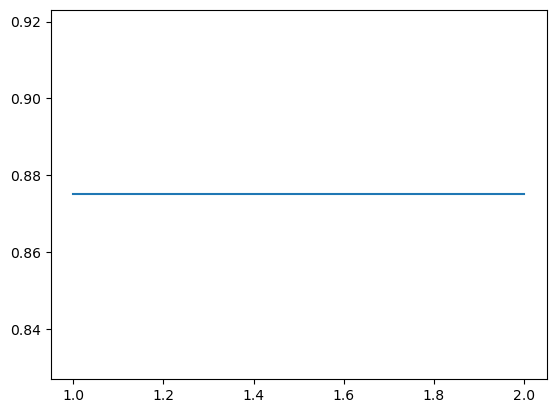

In [164]:
import matplotlib.pyplot as plt
plt.plot(range(1,3),score)

In [188]:
KNC=Pipeline([
    ('clf1',clf1),
    ('KNeighborsClassifier',KNeighborsClassifier(n_neighbors=1))])

In [189]:
KNC.fit(xtrain,ytrain)

Pipeline(steps=[('clf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('OneHotEncoder',
                                                  OneHotEncoder(), [0]),
                                                 ('StandardScaler',
                                                  StandardScaler(), [1, 2])])),
                ('KNeighborsClassifier', KNeighborsClassifier(n_neighbors=1))])

# Performance Evaluation

In [190]:
pred1=LR.predict(xtest)
pred2=DTC.predict(xtest)
pred3=KNC.predict(xtest)

In [191]:
acc1=accuracy_score(ytest,pred1)
acc2=accuracy_score(ytest,pred2)
acc3=accuracy_score(ytest,pred3)

In [192]:
score1=LR.score(xtrain,ytrain)
score2=DTC.score(xtrain,ytrain)
score3=KNC.score(xtrain,ytrain)

In [195]:
print("Model\t\t\t Accuracy_score \t\t Score on Training Data") 
print("""Logistic Regression \t\t {:.3f} \t \t\t {:.3f}""".format(  acc1, score1))
print("""DecisionTreeClassifier \t\t {:.3f} \t \t\t {:.3f}""".format( acc2,score3))
print("""KNeighborsClassifier \t\t {:.3f} \t \t\t {:.3f}""".format(  acc3,score3))

Model			 Accuracy_score 		 Score on Training Data
Logistic Regression 		 0.900 	 		 0.841
DecisionTreeClassifier 		 0.925 	 		 1.000
KNeighborsClassifier 		 0.875 	 		 1.000


Conclusion:
1. The Score on Training data of  DecisionTreeClassifier and KNeighborsClassifier is same(1.0) but in Accuracy_score DecisionTreeClassifier exceed by 0.05% from KNeighborsClassifier
2. LogisticRegression has the least Score on training Data in compare of the others
3. DecisionTreeClassifier has the best Accuracy_score on both Training and Testing Data

DecisionTreeClassifier would be the best model for the best prediction result

# So we Select the Most Efficient Model(DecisionTreeClassifier) for our Prediction 

Now we import Pickle because Pickling is a way to convert a Python object (list, dictionary, etc.) into a character stream. The idea is that this character stream contains all the information necessary to reconstruct the object in another Python script

In [2]:
import pickle

In [ ]:
pickle.dump(DTC,open('ProductPurchasedORnot.pkl','wb'))